In [84]:
import joblib
import lightgbm
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [20]:
df_train = pd.read_csv('home_credit_train_engineered.csv')

df_train.dropna(inplace=True)


## Testing a pretrained LightGBM Model

In [7]:
lgb = joblib.load('home_credit_model.pkl')

In [22]:
features = [f for f in df_train.columns if f not in ['Unnamed: 0','TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]


In [38]:
y_true = df_train['TARGET']
y_pred = lgb.predict(df_train[features])

In [35]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.96    282686
     class 1       0.80      0.09      0.16     24825

    accuracy                           0.92    307511
   macro avg       0.86      0.54      0.56    307511
weighted avg       0.92      0.92      0.90    307511



In [49]:
#Creating train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
df_train[features], df_train['TARGET'], test_size=0.33, random_state=42)


#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [53]:

print("Shape of training sets : ",x_train.shape,y_train.shape)


print("Shape of testing sets : ",x_test.shape,y_test.shape)

Shape of training sets :  (6951, 323) (6951,)
Shape of testing sets :  (3425, 323) (3425,)


##  Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()

In [55]:
clf_NB.fit(x_train,y_train)

GaussianNB()

In [56]:
y_predicted = clf_NB.predict(x_test)

In [57]:
report_nb = classification_report(y_test, y_predicted)

In [58]:
print(report_nb)

              precision    recall  f1-score   support

         0.0       0.92      0.06      0.12      3094
         1.0       0.10      0.95      0.18       331

    accuracy                           0.15      3425
   macro avg       0.51      0.51      0.15      3425
weighted avg       0.84      0.15      0.13      3425



## SVM

In [74]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf_svm = make_pipeline(SVC(gamma='auto'))
clf_svm.fit(x_train, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto'))])

In [91]:
y_pred = clf_svm.predict(x_test)
report_svm = classification_report(y_test,y_pred)

C:\Users\Manas Vardhan\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
print(report_svm)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      3094
         1.0       0.00      0.00      0.00       331

    accuracy                           0.90      3425
   macro avg       0.45      0.50      0.47      3425
weighted avg       0.82      0.90      0.86      3425



In [94]:
set(y_test) - set(y_pred)

# default happening is not being predicted

{1.0}

## Decision Trees

In [100]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier()

In [101]:
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
y_pred = clf_dt.predict(x_test)
report_dt = classification_report(y_test,y_pred)

In [103]:
print(report_dt)

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      3094
         1.0       0.13      0.17      0.15       331

    accuracy                           0.81      3425
   macro avg       0.52      0.53      0.52      3425
weighted avg       0.83      0.81      0.82      3425



## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5, random_state=0)

In [114]:
clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)
report_rf = classification_report(y_test,y_pred)
print(report_rf)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      3094
         1.0       0.00      0.00      0.00       331

    accuracy                           0.90      3425
   macro avg       0.45      0.50      0.47      3425
weighted avg       0.82      0.90      0.86      3425

C:\Users\Manas Vardhan\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Networks

In [115]:
import tensorflow as tf

In [130]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [131]:
model.compile(metrics = 'accuracy',optimizer='adam',loss='binary_crossentropy')

In [132]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.8918 - val_loss: 0.7674 - val_accuracy: 0.9045
Epoch 2/10
218/218 [==============================] - 1s 4ms/step - loss: 0.2995 - accuracy: 0.8950 - val_loss: 0.7088 - val_accuracy: 0.9013
Epoch 3/10
218/218 [==============================] - 1s 5ms/step - loss: 0.2823 - accuracy: 0.8968 - val_loss: 0.6978 - val_accuracy: 0.9022
Epoch 4/10
218/218 [==============================] - 1s 4ms/step - loss: 0.2689 - accuracy: 0.9019 - val_loss: 0.8092 - val_accuracy: 0.9004
Epoch 5/10
218/218 [==============================] - 1s 4ms/step - loss: 0.2537 - accuracy: 0.9053 - val_loss: 0.9368 - val_accuracy: 0.9019
Epoch 6/10
218/218 [==============================] - 1s 5ms/step - loss: 0.2439 - accuracy: 0.9066 - val_loss: 1.1183 - val_accuracy: 0.9010
Epoch 7/10
218/218 [==============================] - 1s 7ms/step - loss: 0.2317 - accuracy: 0.9105 - val_loss: 1.6910 - val_accuracy: 0.8975
Epoch 

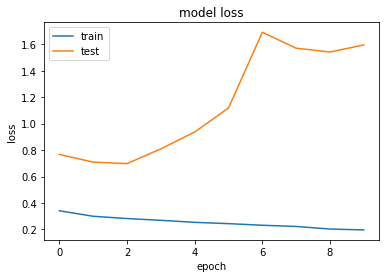

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

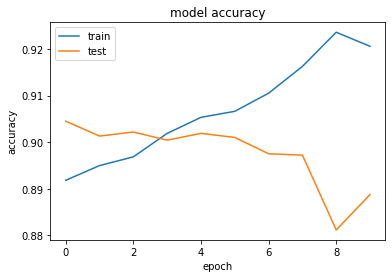

In [136]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
print(classification_report(y_test,model.predict_classes(x_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3094
         1.0       0.32      0.14      0.19       331

    accuracy                           0.89      3425
   macro avg       0.62      0.55      0.57      3425
weighted avg       0.86      0.89      0.87      3425

